Importing required libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', color_codes=True)

plt.style.use('ggplot')

Loading the datasets

In [0]:
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=';')
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=';')

Checking for missing values in red wine dataset

In [3]:
print(red_wine.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


No missing values in red wine dataset.

Checking for missing values in white wine dataset

In [4]:
print(white_wine.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


No missing values in white wine dataset.

Adding two new columns 'type' and 'quality_label' to each dataset

---
**Types**
*   0 for red
*   1 for white

**Quality Label**
*   Low for less than or equal to 5
*   Medium for between 6 and 7
*   High for greater than 7

In [0]:
red_wine['type'] = 0
white_wine['type'] = 1

red_wine['quality_label'] = red_wine.quality.apply(lambda q: "low" if q<=5 else "medium" if q<=7 else "high")
white_wine['quality_label'] = white_wine.quality.apply(lambda q: "low" if q<=5 else "medium" if q<=7 else "high")

Concatenating (row-wise) red wine and white wine datasets into a single dataset called 'wine'

In [0]:
wine = pd.concat([red_wine, white_wine], axis=0)

Checking frequency of each quality label in the wine dataset

In [7]:
wine['quality_label'].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

Checking frequency of each type in the wine dataset

In [8]:
wine['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

Resetting the index column of the wine dataset to the total number of instances (rows)

In [0]:
wine.set_index(['fixed acidity'], inplace=True, append=True, drop=True)
wine.reset_index(inplace=True)
wine = wine.drop(['level_0'], axis=1)

Inspect data

In [10]:
wine

fixed acidity  volatile acidity  citric acid  ...  quality  type  quality_label
0               7.4              0.70         0.00  ...        5     0            low
1               7.8              0.88         0.00  ...        5     0            low
2               7.8              0.76         0.04  ...        5     0            low
3              11.2              0.28         0.56  ...        6     0         medium
4               7.4              0.70         0.00  ...        5     0            low
...             ...               ...          ...  ...      ...   ...            ...
6492            6.2              0.21         0.29  ...        6     1         medium
6493            6.6              0.32         0.36  ...        5     1            low
6494            6.5              0.24         0.19  ...        6     1         medium
6495            5.5              0.29         0.30  ...        7     1         medium
6496            6.0              0.21         0.38  ...        6     1         medium

[6497 rows x 14 columns]

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
quality_label           6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


Saving the processed dataset onto drive for later use

In [12]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
wine.to_csv('wine_quality.csv')
!cp wine_quality.csv "drive/My Drive/"

Plot of frequency of each quality label in the red wine, white wine and also the wine (combined) dataset 

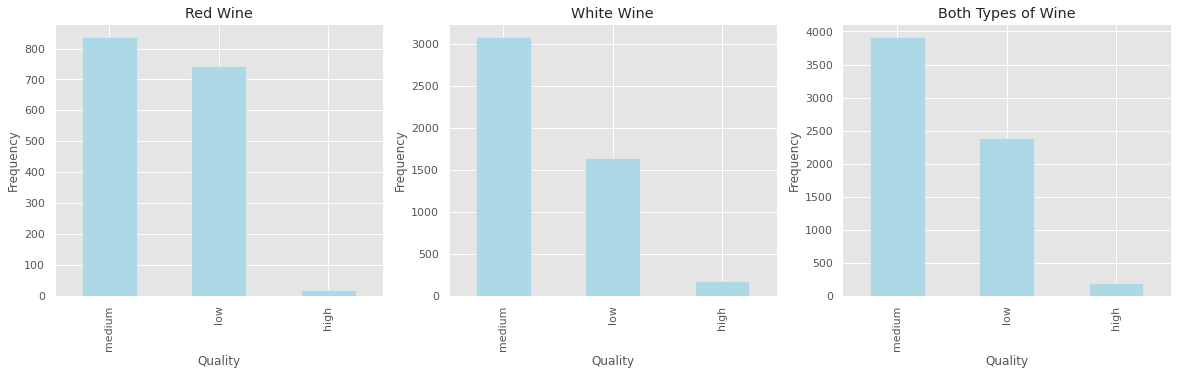

In [14]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency')
red_wine['quality_label'].value_counts().plot(kind='bar', color='lightblue')

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('White Wine')
ax2.set_xlabel('Quality')
ax2.set_ylabel('Frequency')
white_wine['quality_label'].value_counts().plot(kind='bar', color='lightblue')

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Both Types of Wine')
ax3.set_xlabel('Quality')
ax3.set_ylabel('Frequency')
wine['quality_label'].value_counts().plot(kind='bar', color='lightblue')

plt.show()

Plot of frequency of type of wine in the wine dataset

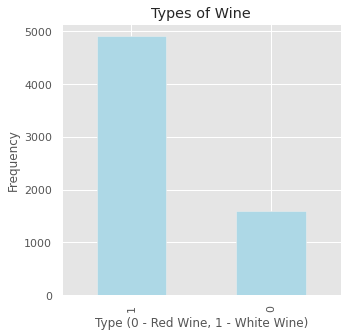

In [15]:
wine['type'].value_counts().plot(kind='bar', color='lightblue', figsize=(5,5))
plt.title('Types of Wine')
plt.xlabel('Type (0 - Red Wine, 1 - White Wine)')
plt.ylabel('Frequency')

plt.show()

Showing the statistics table of red wine dataset

In [16]:
red_wine_stats = round(red_wine.describe(), 2)
red_wine_stats

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality    type
count        1599.00           1599.00      1599.00  ...  1599.00  1599.00  1599.0
mean            8.32              0.53         0.27  ...    10.42     5.64     0.0
std             1.74              0.18         0.19  ...     1.07     0.81     0.0
min             4.60              0.12         0.00  ...     8.40     3.00     0.0
25%             7.10              0.39         0.09  ...     9.50     5.00     0.0
50%             7.90              0.52         0.26  ...    10.20     6.00     0.0
75%             9.20              0.64         0.42  ...    11.10     6.00     0.0
max            15.90              1.58         1.00  ...    14.90     8.00     0.0

[8 rows x 13 columns]

Showing the statistics table of white wine dataset

In [17]:
white_wine_stats = round(white_wine.describe(), 2)
white_wine_stats

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality    type
count        4898.00           4898.00      4898.00  ...  4898.00  4898.00  4898.0
mean            6.85              0.28         0.33  ...    10.51     5.88     1.0
std             0.84              0.10         0.12  ...     1.23     0.89     0.0
min             3.80              0.08         0.00  ...     8.00     3.00     1.0
25%             6.30              0.21         0.27  ...     9.50     5.00     1.0
50%             6.80              0.26         0.32  ...    10.40     6.00     1.0
75%             7.30              0.32         0.39  ...    11.40     6.00     1.0
max            14.20              1.10         1.66  ...    14.20     9.00     1.0

[8 rows x 13 columns]

In [19]:
attributes = wine.columns
print(attributes)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label'],
      dtype='object')


Showing statistics of low quality wine

In [20]:
low_quality_stats = round(wine[wine['quality_label'] == "low"][attributes].describe(), 2)
low_quality_stats

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality     type
count        2384.00           2384.00      2384.00  ...  2384.00  2384.00  2384.00
mean            7.33              0.40         0.30  ...     9.87     4.88     0.69
std             1.27              0.19         0.16  ...     0.84     0.36     0.46
min             4.20              0.10         0.00  ...     8.00     3.00     0.00
25%             6.50              0.26         0.21  ...     9.30     5.00     0.00
50%             7.10              0.34         0.30  ...     9.60     5.00     1.00
75%             7.80              0.50         0.40  ...    10.40     5.00     1.00
max            15.90              1.58         1.00  ...    14.90     5.00     1.00

[8 rows x 13 columns]

Showing statistics of medium quality wine

In [21]:
medium_quality_stats = round(wine[wine['quality_label'] == "medium"][attributes].describe(), 2)
medium_quality_stats

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality     type
count        3915.00           3915.00      3915.00  ...  3915.00  3915.00  3915.00
mean            7.16              0.31         0.33  ...    10.81     6.28     0.79
std             1.31              0.14         0.13  ...     1.20     0.45     0.41
min             3.80              0.08         0.00  ...     8.40     6.00     0.00
25%             6.40              0.21         0.26  ...     9.80     6.00     1.00
50%             6.90              0.27         0.31  ...    10.80     6.00     1.00
75%             7.60              0.36         0.39  ...    11.70     7.00     1.00
max            15.60              1.04         1.66  ...    14.20     7.00     1.00

[8 rows x 13 columns]

Showing statistics of high quality wine

In [22]:
high_quality_stats = round(wine[wine['quality_label'] == "high"][attributes].describe(), 2)
high_quality_stats

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality    type
count         198.00            198.00       198.00  ...   198.00   198.00  198.00
mean            6.85              0.29         0.33  ...    11.69     8.03    0.91
std             1.14              0.12         0.10  ...     1.27     0.16    0.29
min             3.90              0.12         0.03  ...     8.50     8.00    0.00
25%             6.20              0.21         0.28  ...    11.00     8.00    1.00
50%             6.80              0.28         0.32  ...    12.00     8.00    1.00
75%             7.30              0.35         0.37  ...    12.60     8.00    1.00
max            12.60              0.85         0.74  ...    14.00     9.00    1.00

[8 rows x 13 columns]

Attributes' Lineplot vs 'type' Target

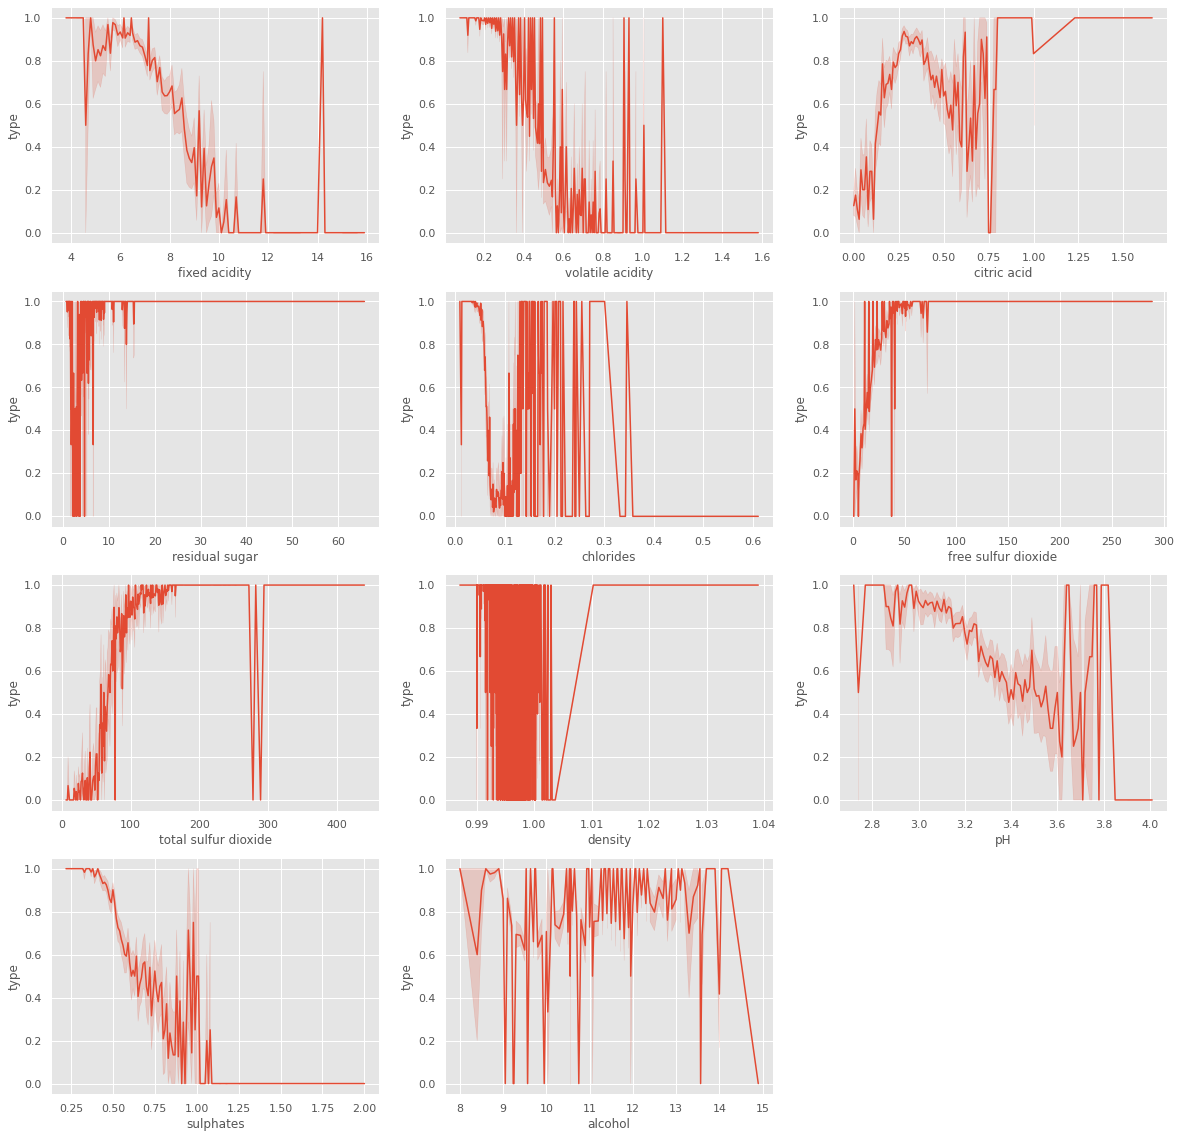

In [23]:
fig = plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.lineplot(x="fixed acidity", y="type", data=wine)

plt.subplot(4,3,2)
sns.lineplot(x="volatile acidity", y="type", data=wine)

plt.subplot(4,3,3)
sns.lineplot(x="citric acid", y="type", data=wine)

plt.subplot(4,3,4)
sns.lineplot(x="residual sugar", y="type", data=wine)

plt.subplot(4,3,5)
sns.lineplot(x="chlorides", y="type", data=wine)

plt.subplot(4,3,6)
sns.lineplot(x="free sulfur dioxide", y="type", data=wine)

plt.subplot(4,3,7)
sns.lineplot(x="total sulfur dioxide", y="type", data=wine)

plt.subplot(4,3,8)
sns.lineplot(x="density", y="type", data=wine)

plt.subplot(4,3,9)
sns.lineplot(x="pH", y="type", data=wine)

plt.subplot(4,3,10)
sns.lineplot(x="sulphates", y="type", data=wine)

plt.subplot(4,3,11)
sns.lineplot(x="alcohol", y="type", data=wine)

plt.show()

Attributes' Pairplot distinguishing based on 'type'

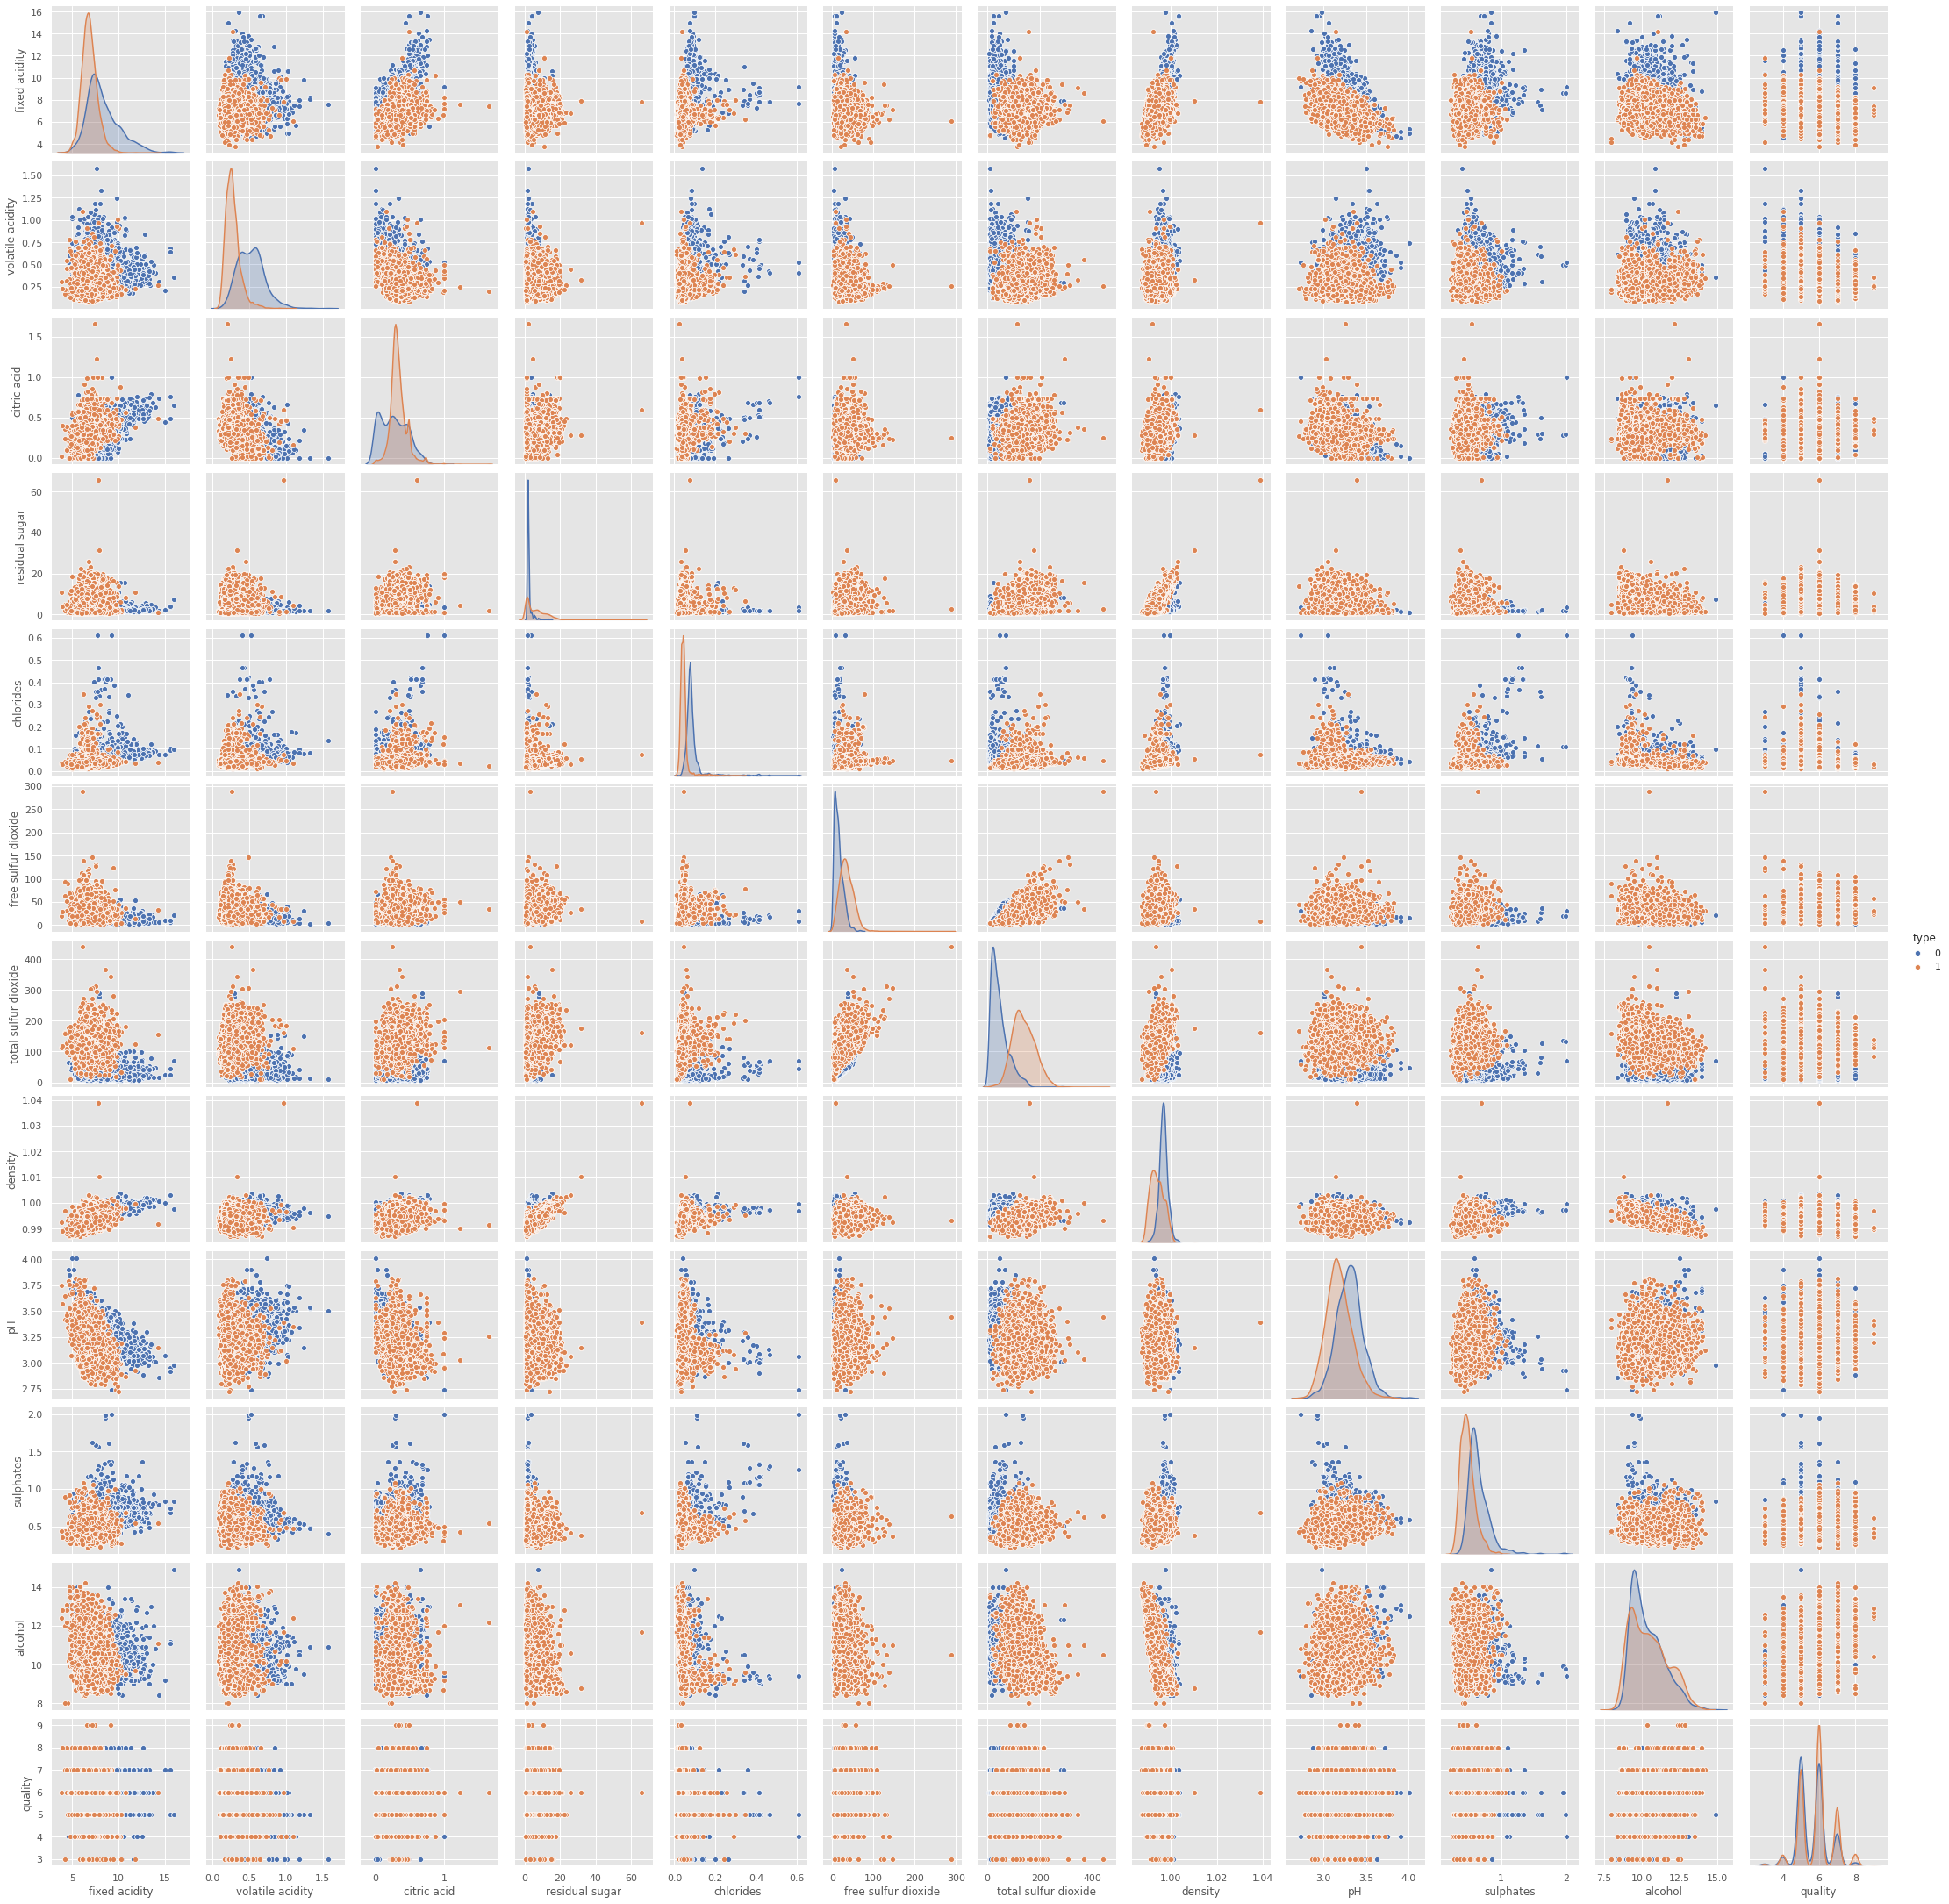

In [24]:
sns.pairplot(data=wine, hue='type', palette='deep')

plt.show()

Attributes' Lineplot vs 'quality' Target

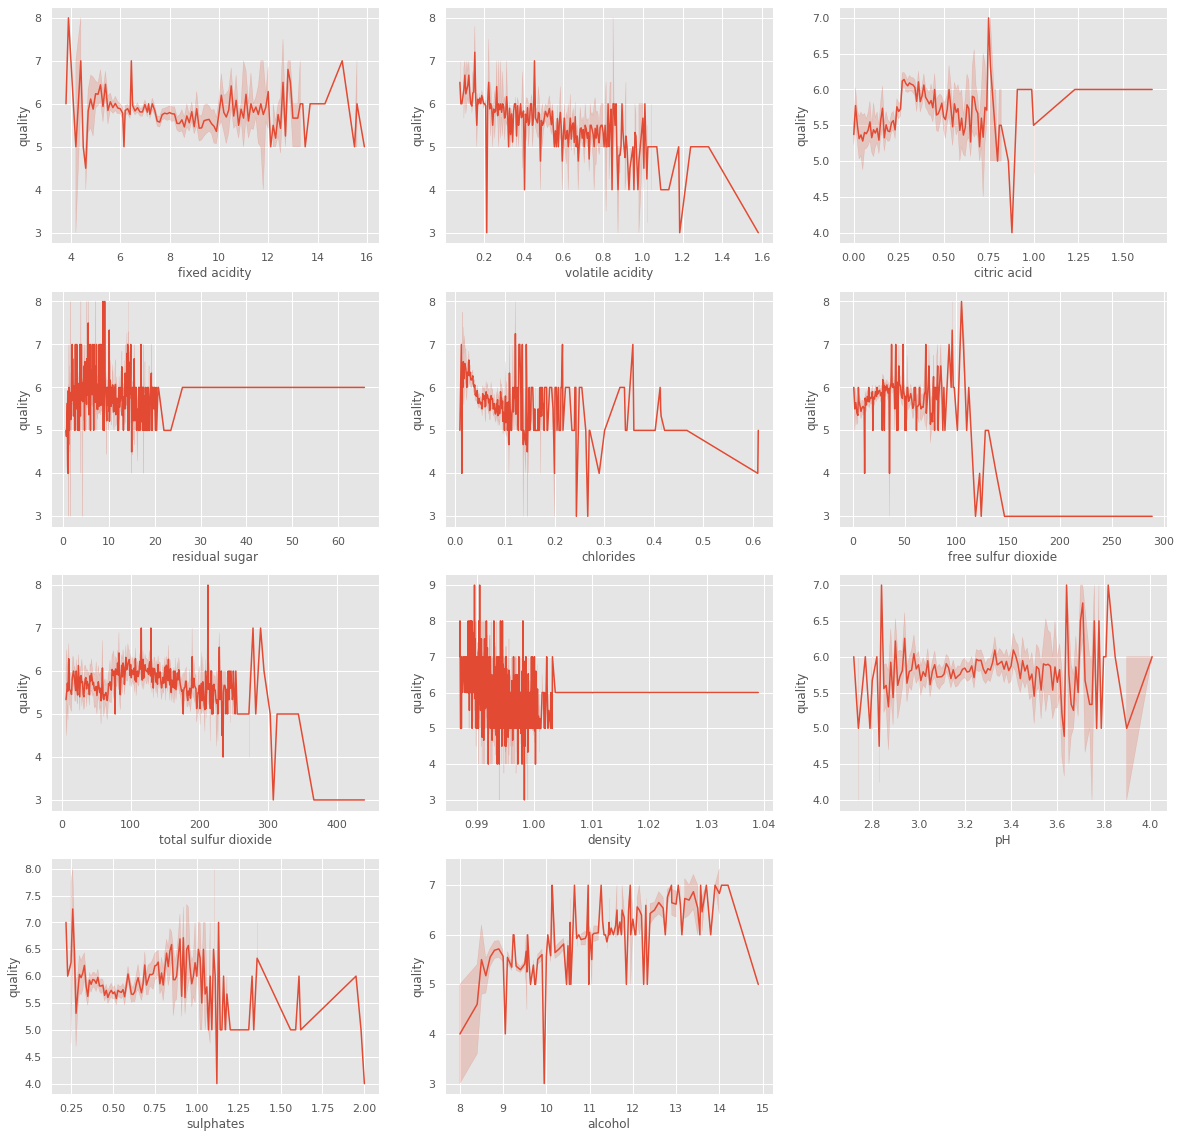

In [25]:
fig = plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.lineplot(x="fixed acidity", y="quality", data=wine)

plt.subplot(4,3,2)
sns.lineplot(x="volatile acidity", y="quality", data=wine)

plt.subplot(4,3,3)
sns.lineplot(x="citric acid", y="quality", data=wine)

plt.subplot(4,3,4)
sns.lineplot(x="residual sugar", y="quality", data=wine)

plt.subplot(4,3,5)
sns.lineplot(x="chlorides", y="quality", data=wine)

plt.subplot(4,3,6)
sns.lineplot(x="free sulfur dioxide", y="quality", data=wine)

plt.subplot(4,3,7)
sns.lineplot(x="total sulfur dioxide", y="quality", data=wine)

plt.subplot(4,3,8)
sns.lineplot(x="density", y="quality", data=wine)

plt.subplot(4,3,9)
sns.lineplot(x="pH", y="quality", data=wine)

plt.subplot(4,3,10)
sns.lineplot(x="sulphates", y="quality", data=wine)

plt.subplot(4,3,11)
sns.lineplot(x="alcohol", y="quality", data=wine)

plt.show()

Attributes' Pairplot distinguishing based on 'quality_label'

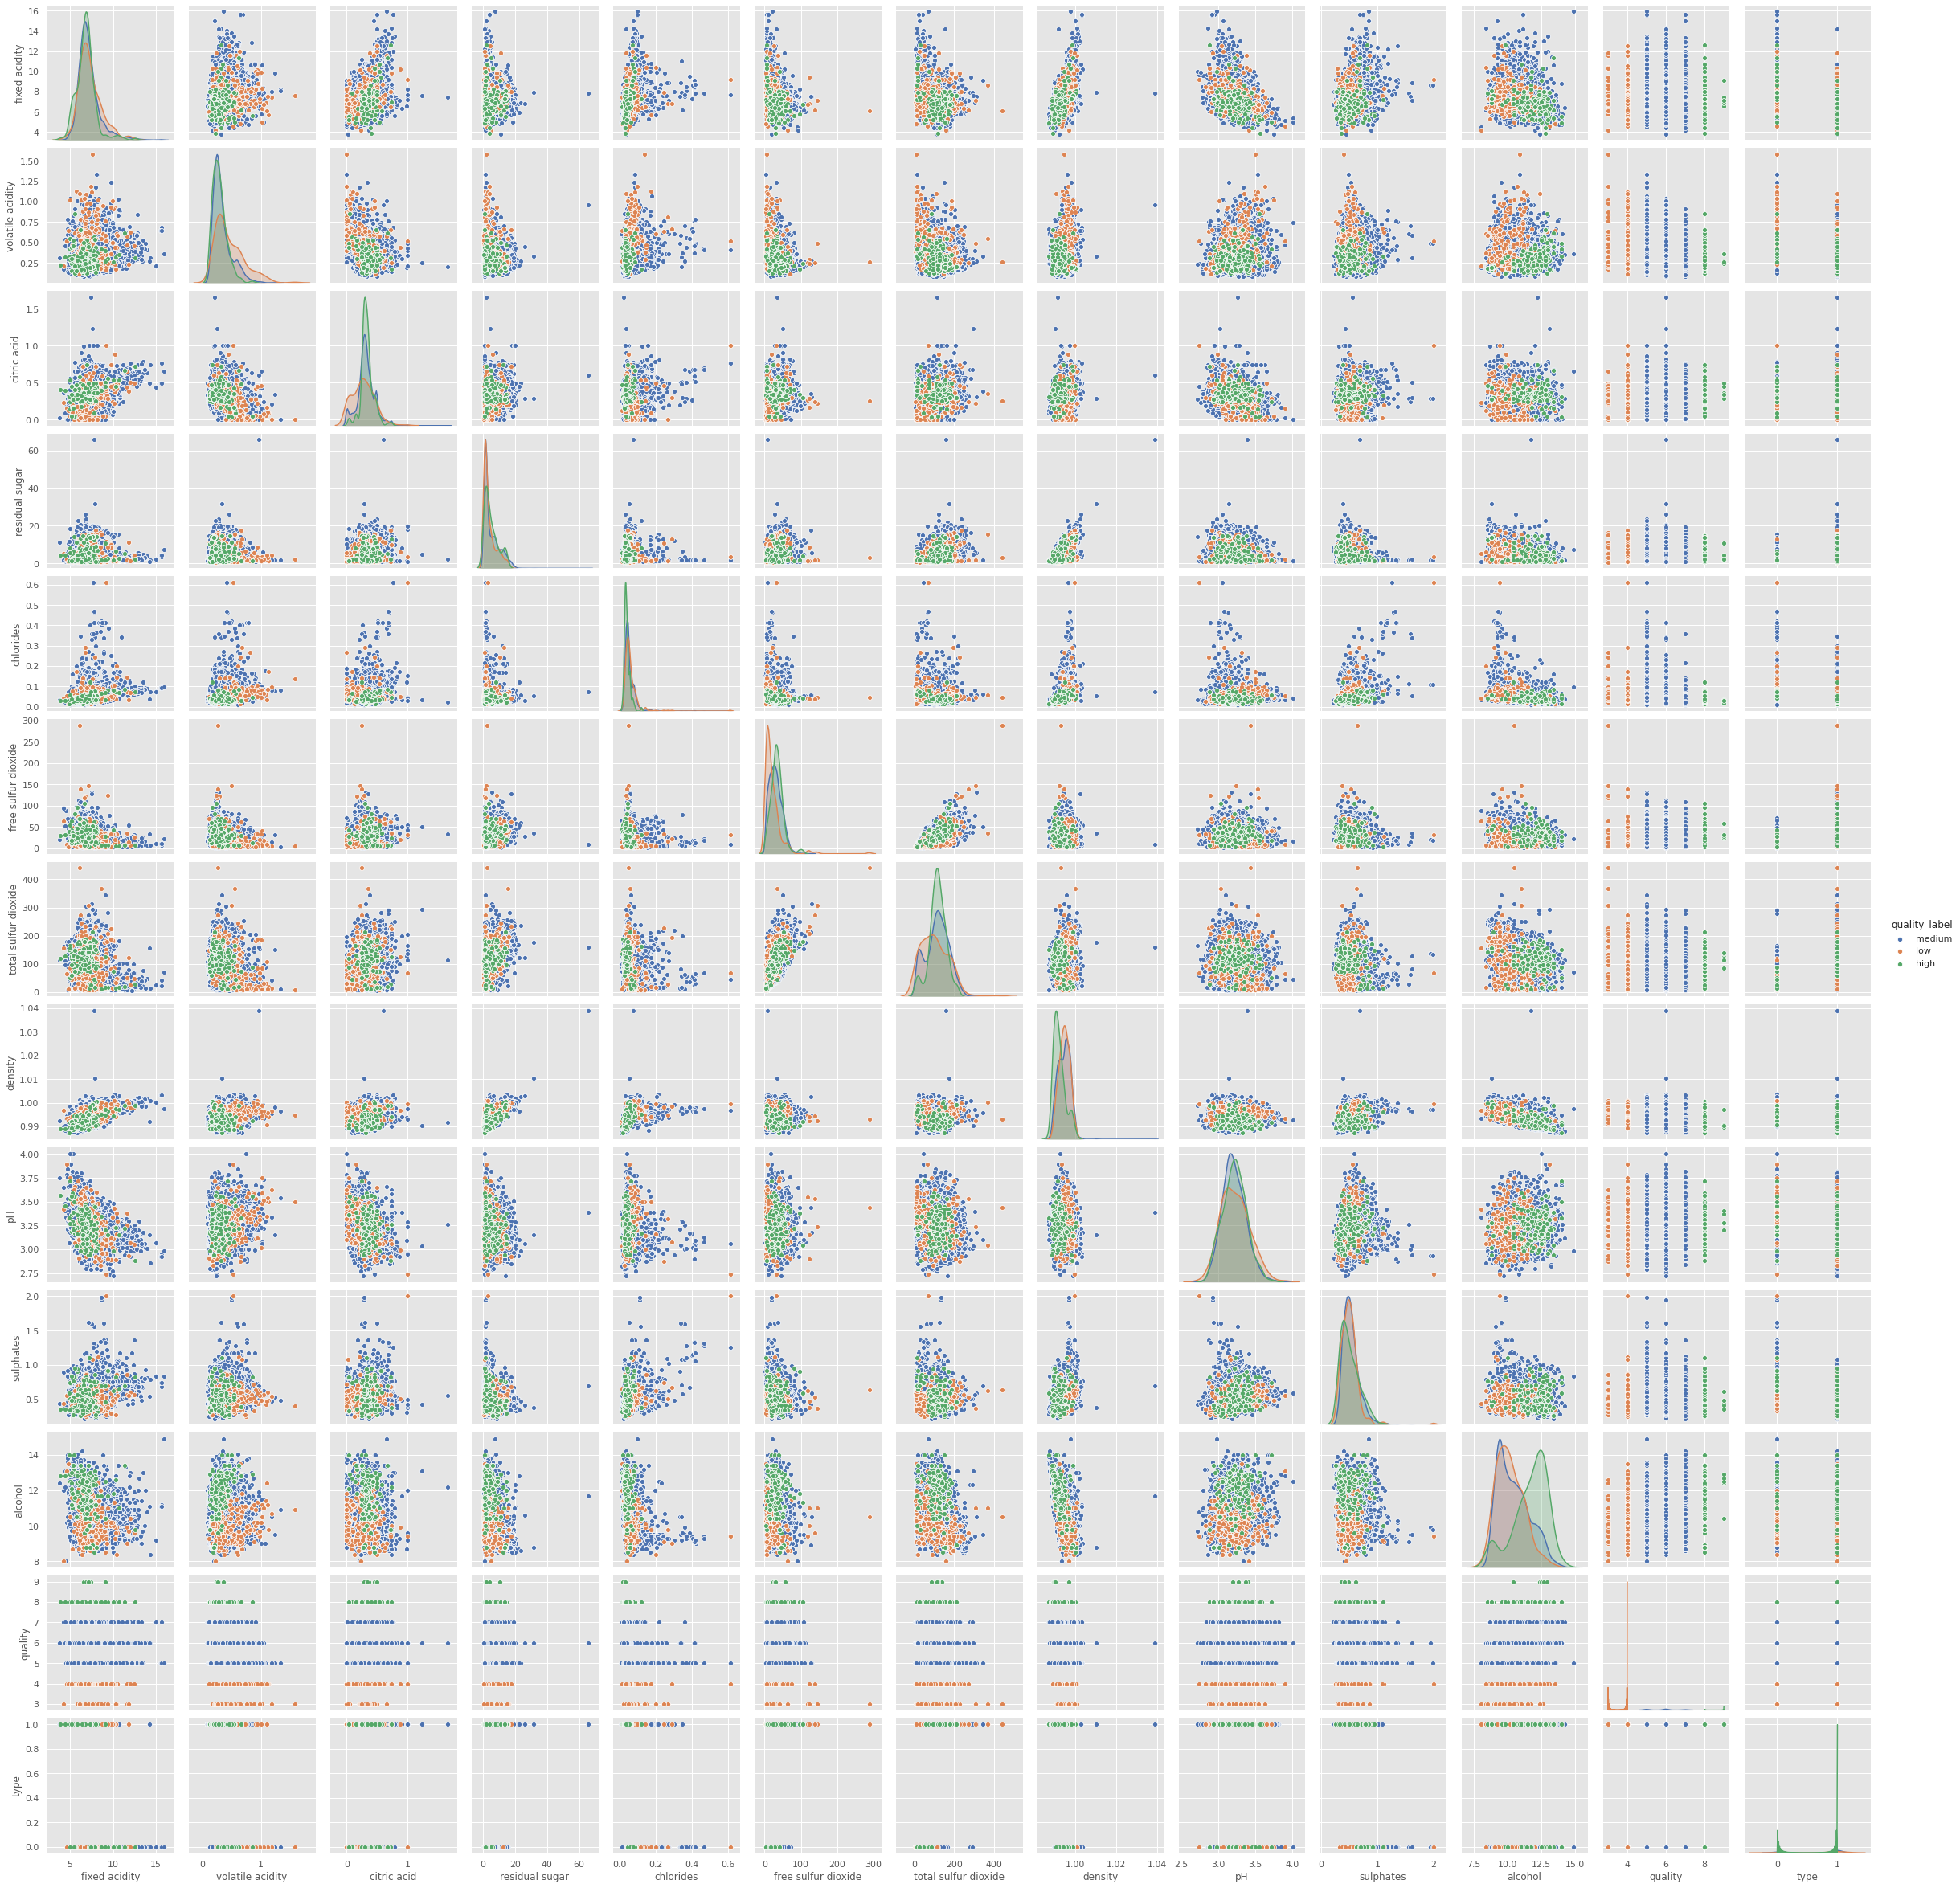

In [26]:
sns.pairplot(data=wine, hue='quality_label', palette='deep')

plt.show()

Boxplot of Quality vs Alcohol % and Quality Label vs Alcohol %

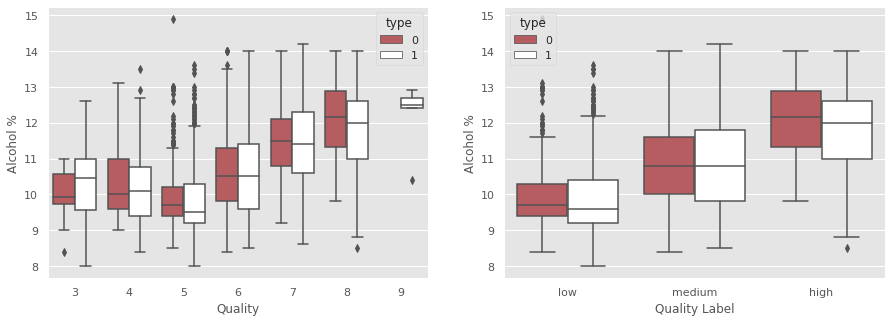

In [26]:
fig1 = plt.figure(figsize=(15,5))

ax1 = fig1.add_subplot(1,2,1)
sns.boxplot(x="quality", y="alcohol", hue="type", data=wine, palette={0: 'r', 1: 'w'})
ax1.set_xlabel("Quality")
ax1.set_ylabel("Alcohol %")

ax2 = fig1.add_subplot(1,2,2)
sns.boxplot(x="quality_label", y="alcohol", hue="type", data=wine, palette={0: 'r', 1: 'w'})
ax2.set_xlabel("Quality Label")
ax2.set_ylabel("Alcohol %")

plt.show()

Finding Pearson correlation and plotting heatmap of the same

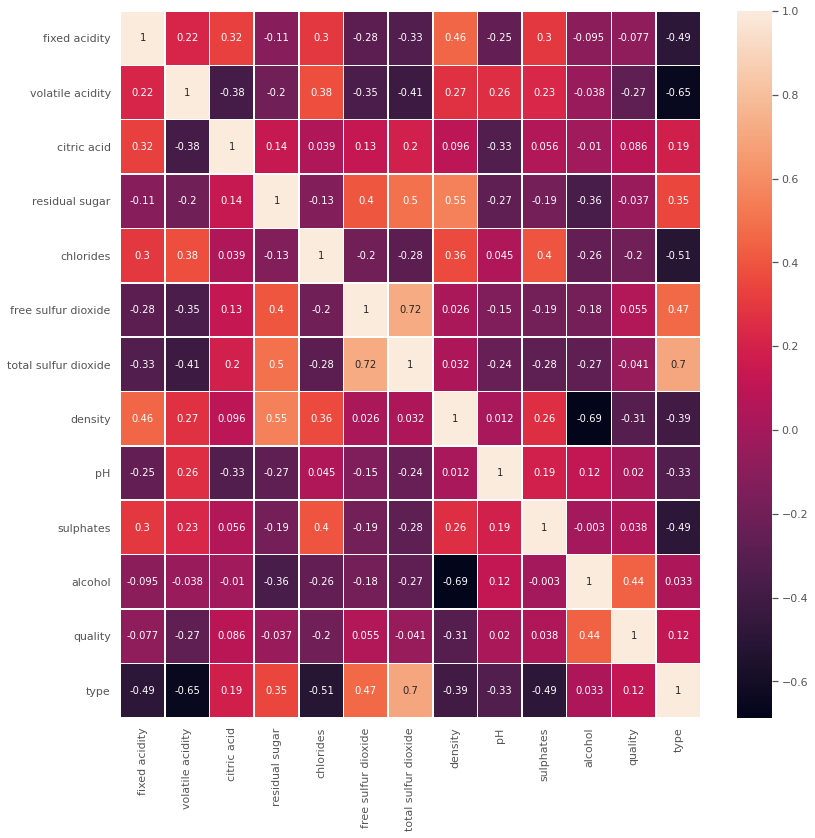

In [27]:
wine_corr = wine.corr('pearson')

fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(wine_corr, annot=True, linewidth=0.5, ax=ax)

plt.show()

Pearson correlation of attributes w.r.t. 'quality'

In [28]:
wine_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Pearson correlation of attributes w.r.t. 'type'

In [29]:
wine_corr['type'].sort_values(ascending=False)

type                    1.000000
total sulfur dioxide    0.700357
free sulfur dioxide     0.471644
residual sugar          0.348821
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
pH                     -0.329129
density                -0.390645
fixed acidity          -0.486740
sulphates              -0.487218
chlorides              -0.512678
volatile acidity       -0.653036
Name: type, dtype: float64

Highlights from the above analysis:

---
* Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine.
* Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.
* It is interesting how alcohol does not give us much variation to distinguish whether the vine is white or red, but it makes a lot of difference in quality. Note that the higher the quality the higher the average alcohol concentration, increased by about 1% at each level. Although lower quality wines have the lowest standard deviation.
* The chlorides and volatile acidity are less present and presented smaller standard deviation in wines of higher quality.
* The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase the quality.
* Higher quality has less fixed acidity, but the standard deviation is slightly higher in mean quality.


**Conclusion**
> In the further notebooks, we will be using Logistic Regression to predict the type of wine taking into consideration the attributes 'volatile acidity' and 'total sulfur dioxide', and Neural Networks to predict the quality label of the wines.